# ***Exploratory Data Analisys - Análisis sobre los hábitos de vida del ciudadano***
## ➡️ **Primera exploración del Dataset descodificado y primeras visualizaciones**
------

### 🗒️**Bloque de contenidos:**

1. [Importación de módulos](#1-importación-de-módulos)
2. [Exploración inicial](#2-exploración-inicial)  
    2.1. [Vista general](#21-vista-general)  
    2.2. [Renombramiento de columnas](#22-renombramiento-de-columnas)  
    2.3. [Tipos de datos y primera visualización de nulos](#23-tipos-de-datos-y-primera-visualización-de-nulos)  
    2.4. [Duplicados](#24-duplicados)  
    2.5. [Distribución de las variables](#25-distribución-de-las-variables)

### **1. Importación de módulos**

In [1]:
%pwd

'c:\\Users\\sorim\\Documents\\Data_Science\\Evolve\\repos\\projects-evolve\\EDA\\notebooks'

In [2]:
# Ajusto la ruta
%cd ..

c:\Users\sorim\Documents\Data_Science\Evolve\repos\projects-evolve\EDA


In [3]:
from scripts.funciones import *
from scripts.modulos import *

### **2. Exploración inicial**
#### ***2.1. Vista general***
Ahora que ya tenemos el dataset que queremos, lo cargamos y trabajamos sobre él.

Por lo que, en primer lugar, realizaremos una vista general de los datos.

In [4]:
df = pd.read_csv('./data/mapped_data.csv', low_memory = False) # Me salía un warning y me recomendó poner este argumento a False.
df.head()

,EXERANY2,ASTHMA3,CHCOCNC1,COLGSEX1,_AGEG5YR,INCOME3,_EDUCAG,EMPLOY1,_STATE,_BMI5CAT,SLEPTIM1,SMOKE100,ALCDAY4,MENTHLTH,GENHLTH,PHYSHLTH,DIABETE4,CVDCRHD4
0,No,No,No,NaN,Age 80 or older,Refused,Graduated from College or Technical School,Retired,Alabama,NaN,8.0,No,No drinks in past 30 days,NaN,Very good,NaN,Yes,No
1,No,No,Yes,NaN,Age 80 or older,"$25,000 to < $35,000",Graduated High School,Self-employed,Alabama,Overweight,6.0,No,No drinks in past 30 days,NaN,Excellent,NaN,No,No
2,Yes,No,No,NaN,Age 55 to 59,"$150,000 to < $200,000",Graduated from College or Technical School,Retired,Alabama,Overweight,5.0,No,No drinks in past 30 days,3.0,Very good,2.0,No,No
3,Yes,Yes,No,NaN,NaN,Don’t know/Not sure,Graduated High School,Retired,Alabama,Normal Weight,7.0,Yes,No drinks in past 30 days,NaN,Excellent,NaN,No,No
4,Yes,No,No,NaN,Age 30 to 44,"$25,000 to < $35,000",Attended College or Technical School,A homemaker,Alabama,Normal Weight,9.0,No,2 days per week,NaN,Fair,2.0,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   EXERANY2  445130 non-null  object
 1   ASTHMA3   445130 non-null  object
 2   CHCOCNC1  445129 non-null  object
 3   COLGSEX1  21 non-null      object
 4   _AGEG5YR  436053 non-null  object
 5   INCOME3   432200 non-null  object
 6   _EDUCAG   442749 non-null  object
 7   EMPLOY1   438936 non-null  object
 8   _STATE    445132 non-null  object
 9   _BMI5CAT  396326 non-null  object
 10  SLEPTIM1  445129 non-null  object
 11  SMOKE100  413355 non-null  object
 12  ALCDAY4   404369 non-null  object
 13  MENTHLTH  179900 non-null  object
 14  GENHLTH   445129 non-null  object
 15  PHYSHLTH  177308 non-null  object
 16  DIABETE4  445129 non-null  object
 17  CVDCRHD4  445130 non-null  object
dtypes: object(18)
memory usage: 61.1+ MB


Podemos observar que todas las columnas son de tipo `object` y hay nulos. Por lo que lo siguiente que realizaremos es:

- Cambiar el nombre de las columnas para que sean más significativas y sepamos en todo momento sobre qué información estamos trabajando

- Analizar el tipo de las columnas y cambiar si fuese necesario.

- Analaizar los `NaN` y si se puede realizar alguna transformación.

#### ***2.2. Renombramiento de columnas***

In [5]:
# Renombro las columnas
name_cols = {'EXERANY2': 'ejercicio',
             'SLEPTIM1': 'sueño_h',
             'SMOKE100': 'fumar',
             'ALCDAY4': 'alcohol',
             'MENTHLTH': 'salud_mental_malos',
             'GENHLTH': 'salud_general',
             'PHYSHLTH': 'salud_fisica_mala',
             'DIABETE4': 'diabetes',
             'CVDCRHD4': 'enf_cardio',
             'ASTHMA3': 'asma',
             'CHCOCNC1': 'cancer',
             'COLGSEX1': 'genero',
             '_AGEG5YR': 'grupo_edad',
             'INCOME3': 'ingresos',
             '_EDUCAG': 'educacion',
             'EMPLOY1': 'empleo',
             '_STATE': 'estado',
             '_BMI5CAT': 'IMC'}

df.rename(columns=name_cols, inplace=True)
df.sample()

,ejercicio,asma,cancer,genero,grupo_edad,ingresos,educacion,empleo,estado,IMC,sueño_h,fumar,alcohol,salud_mental_malos,salud_general,salud_fisica_mala,diabetes,enf_cardio
225509,Yes,No,No,NaN,Age 50 to 54,"$75,000 to < $100,000",Graduated from College or Technical School,Self-employed,Montana,Overweight,7.0,Yes,2 days per week,NaN,Very good,NaN,No,No


#### ***2.3. Tipos de datos y primera visualización de nulos***

A continuación, veremos cada una de las variables y nos centraremos en la tipología de sus datos

In [ ]:
df['ejercicio'].value_counts(dropna=False)

ejercicio
Yes                    337559
No                     106480
Don’t know/Not sure       724
Refused                   367
NaN                         2
Name: count, dtype: int64

In [ ]:
df['ejercicio'].dtype

dtype('O')

    Dejamos como está esta variable contando que tiene únicamente dos NaN

In [ ]:
df['sueño_h'].value_counts(dropna=False)

sueño_h
7.0                    132927
8.0                    125442
6.0                     95880
5.0                     30122
9.0                     21210
4.0                     12433
10.0                    10459
Don’t know/Not sure      4792
3.0                      3260
12.0                     3004
2.0                      1549
1.0                      1154
11.0                      686
Refused                   658
16.0                      329
15.0                      317
14.0                      295
18.0                      168
13.0                      165
20.0                      143
24.0                       52
17.0                       27
22.0                       19
23.0                       18
19.0                       16
21.0                        4
NaN                         3
Name: count, dtype: int64

In [ ]:
df['sueño_h'].dtype

dtype('O')

    Aunque sea de tipo object, a lo mejor es mejor tratarla como una numérica. Sin embargo, debido a esos valores categóricos (Don’t know/Not Sure y Refused), lo podríamos tratar como NaN y los sumamos a los 3 valores que aparecen

In [ ]:
df['sueño_h'].value_counts(dropna=False)[['Don’t know/Not sure', 'Refused', np.nan]].sum()

np.int64(5453)

    Habría en total 5453 nulos en sueño_h

In [ ]:
df['fumar'].value_counts(dropna=False)

fumar
No                     245955
Yes                    164217
NaN                     31777
Don’t know/Not sure      2297
Refused                   886
Name: count, dtype: int64

In [ ]:
df['fumar'].dtype

dtype('O')

    La tratamos igual que la variable 'ejercicio' aunque tiene un gran número de NaN

In [ ]:
df['alcohol'].value_counts(dropna=False)

alcohol
No drinks in past 30 days    187667
2 days per week              144740
1 day per week                66151
NaN                           40763
Don’t know/Not sure            3447
Refused                        2364
Name: count, dtype: int64

In [ ]:
df['alcohol'].dtype

dtype('O')

    La tratamos igual que la variable 'ejercicio' y 'fumar' aunque tiene un gran número de NaN

In [ ]:
df['salud_mental_malos'].value_counts(dropna=False)

salud_mental_malos
NaN                    265232
30.0                    26990
2.0                     23785
5.0                     19951
10.0                    15414
3.0                     15345
15.0                    14519
1.0                     14409
20.0                     9150
4.0                      7943
7.0                      7844
Don’t know/Not sure      6589
25.0                     3078
14.0                     2871
Refused                  2475
6.0                      2305
8.0                      1749
12.0                     1259
28.0                      910
21.0                      549
29.0                      502
9.0                       322
18.0                      319
16.0                      280
17.0                      244
27.0                      241
22.0                      193
13.0                      169
24.0                      124
11.0                      121
26.0                      106
23.0                       97
19.0                 

In [ ]:
df['salud_mental_malos'].dtype

dtype('O')

In [ ]:
df['salud_mental_malos'].value_counts(dropna=False)[['Don’t know/Not sure', 'Refused', np.nan]].sum()

np.int64(274296)

    Esta variable también convendría tratarla como una numérica por lo que, si hacemos la misma operación que con la variable 'sueño_h', quedarían muchos valores desconocidos.

In [ ]:
df['salud_general'].value_counts(dropna=False)

salud_general
Very good              148444
Good                   143598
Excellent               71878
Fair                    60273
Poor                    19741
Don’t know/Not sure       810
Refused                   385
NaN                         3
Name: count, dtype: int64

In [ ]:
df['salud_general'].dtype

dtype('O')

    La tratamos igual que la variable 'ejercicio', 'fumar' y 'alcohol' teniendo bastantes NaN si sumamos los valores desconocidos

In [ ]:
df['salud_fisica_mala'].value_counts(dropna=False)

salud_fisica_mala
NaN                    267824
30.0                    33082
2.0                     25256
1.0                     17250
3.0                     15948
5.0                     15315
10.0                    10589
7.0                      9348
Don’t know/Not sure      8875
15.0                     8787
4.0                      8462
20.0                     5421
14.0                     5029
6.0                      2538
25.0                     2181
Refused                  2047
8.0                      1761
12.0                     1111
21.0                     1038
28.0                      751
9.0                       411
29.0                      365
18.0                      271
16.0                      255
27.0                      188
17.0                      185
13.0                      162
11.0                      161
22.0                      140
24.0                      125
26.0                      109
23.0                       99
19.0                  

In [ ]:
df['salud_fisica_mala'].value_counts(dropna=False)[['Don’t know/Not sure', 'Refused', np.nan]].sum()

np.int64(278746)

In [ ]:
df['diabetes'].value_counts(dropna=False)

diabetes
No                                            368722
Yes                                            61158
Pre-diabetes or borderline diabetes            10329
Yes, but female told only during pregnancy      3836
Don’t know/Not sure                              763
Refused                                          321
NaN                                                3
Name: count, dtype: int64

In [ ]:
df['enf_cardio'].value_counts(dropna=False)

enf_cardio
No                     414176
Yes                     26551
Don’t know/Not sure      4044
Refused                   359
NaN                         2
Name: count, dtype: int64

In [ ]:
df['asma'].value_counts(dropna=False)

asma
No                     376665
Yes                     66694
Don’t know/Not sure      1494
Refused                   277
NaN                         2
Name: count, dtype: int64

In [ ]:
df['cancer'].value_counts(dropna=False)

cancer
No                     392442
Yes                     50269
Don’t know/Not sure      2016
Refused                   402
NaN                         3
Name: count, dtype: int64

In [ ]:
df['genero'].value_counts(dropna=False)

genero
NaN       445111
Female        16
Male           5
Name: count, dtype: int64

    Curioso que la mayoría de las personas que se sometieron a esta encuesta no quisieron decir de qué sexo eran

In [ ]:
df['grupo_edad'].value_counts(dropna=False)

grupo_edad
Age 65 to 69       47099
Age 60 to 64       44511
Age 70 to 74       43472
Age 55 to 59       36821
Age 80 or older    36251
Age 50 to 54       33644
Age 75 to 79       32518
Age 30 to 44       29942
Age 45 to 49       28531
Age 35 to 39       28526
Age 18 to 24       26941
Age 30 to 34       25807
Age 25 to 29       21990
NaN                 9079
Name: count, dtype: int64

In [ ]:
df['ingresos'].value_counts(dropna=False)

ingresos
$50,000 to < $75,000      59148
$100,000 to < $150,000    50330
$75,000 to < $100,000     48436
Refused                   47001
$35,000 to < $50,000      46831
$25,000 to < $35,000      42294
Don’t know/Not sure       36114
$200,000 or more          23478
$150,000 to < $200,000    22553
$20,000 to < $25,000      20343
$15,000 to < $20,000      14300
NaN                       12932
$10,000 to < $15,000      11031
Less than $10,000         10341
Name: count, dtype: int64

In [ ]:
df['educacion'].value_counts(dropna=False)

educacion
Graduated from College or Technical School    187496
Attended College or Technical School          120252
Graduated High School                         108990
Did not graduate High School                   26011
NaN                                             2383
Name: count, dtype: int64

In [ ]:
df['empleo'].value_counts(dropna=False)

empleo
Employed for wages                  186004
Retired                             137083
Self-employed                        38768
Unable to work                       26737
A homemaker                          17477
A student                            11111
Out of work for 1 year or more        8668
Out of work for less than 1 year      8044
NaN                                   6196
Refused                               5044
Name: count, dtype: int64

In [ ]:
df['estado'].value_counts(dropna=False)

estado
Washington              26152
New York                17800
Minnesota               16821
Ohio                    16487
Maryland                16418
Texas                   14245
Florida                 13393
Wisconsin               11276
Kansas                  11247
Massachusetts           11029
California              10952
Maine                   10646
Indiana                 10466
Virginia                10417
Arizona                 10185
Michigan                10058
South Carolina          10037
Utah                     9826
Connecticut              9784
Colorado                 9365
Georgia                  9236
Iowa                     8949
Vermont                  8811
New Jersey               8209
Hawaii                   7747
Nebraska                 7473
Missouri                 7438
South Dakota             7424
Montana                  7048
New Hampshire            6757
Idaho                    6280
Rhode Island             5893
Alaska                   5865
Okl

In [ ]:
df['estado'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

In [ ]:
df['IMC'].value_counts(dropna=False)

IMC
Overweight       139995
Obese            132577
Normal Weight    116976
NaN               48806
Underweight        6778
Name: count, dtype: int64

En resumen:

- Todas las variables tienen valores `NaN` por lo que antes de ver cómo transformarlas tendremos en cuenta:

    - Los valores duplicados.

    - Si en una misma fila hay bastantes nulos.

- Con este análisis de cada variable, podemos clasificar en dos grandes grupos:

    - **Variables de tipo categórica**: `ejercicio`, `fumar`, `alcohol`, `salud_general`, `diabetes`, `enf_cardio`, `asma`, `cancer`, `grupo_edad`, `ingresos` (va por rangos), `educacion`, `empleo`, `estado` y `IMC`.

    - **Variables de tipo numérica**: `sueño_h`, `salud_mental_malos`, `salud_fisica_mala`.

Me planteo eliminar la variable `genero` por el gran número de nulos y no aportaría mucha información al análisis.

#### ***2.4. Duplicados***

In [ ]:
df.duplicated(keep=False).sum()

np.int64(5390)

De 445.132 valores, existen 5.390 filas en total que están duplicadas.

Se puede profundizar más y ver si las variables tienen más valores nulos o no.

In [ ]:
df_dup = df[df.duplicated(keep=False)]
nan_dup = df_dup.isna().sum()
nan_df = df.isna().sum()
dif_nulos = nan_df - nan_dup

In [ ]:
print(f'Nulos en el DF de duplicados:\n\n{nan_dup}')

Nulos en el DF de duplicados:

ejercicio                0
sueño_h                  0
fumar                  517
alcohol                523
salud_mental_malos    5143
salud_general            0
salud_fisica_mala     5295
diabetes                 0
enf_cardio               0
asma                     0
cancer                   0
genero                5390
grupo_edad              65
ingresos               454
educacion               17
empleo                 249
estado                   0
IMC                    576
dtype: int64


In [ ]:
print(f'Nulos en el DF completo:\n\n{nan_df}')

Nulos en el DF completo:

ejercicio                  2
sueño_h                    3
fumar                  31777
alcohol                40763
salud_mental_malos    265232
salud_general              3
salud_fisica_mala     267824
diabetes                   3
enf_cardio                 2
asma                       2
cancer                     3
genero                445111
grupo_edad              9079
ingresos               12932
educacion               2383
empleo                  6196
estado                     0
IMC                    48806
dtype: int64


In [ ]:
print(f'Diferencia entre ambos:\n\n{dif_nulos}')

Diferencia entre ambos:

ejercicio                  2
sueño_h                    3
fumar                  31260
alcohol                40240
salud_mental_malos    260089
salud_general              3
salud_fisica_mala     262529
diabetes                   3
enf_cardio                 2
asma                       2
cancer                     3
genero                439721
grupo_edad              9014
ingresos               12478
educacion               2366
empleo                  5947
estado                     0
IMC                    48230
dtype: int64


    En la celda anterior es un simulacro de cómo se quedarían los nulos en cada variable si eliminásemos TODAS las filas duplicadas.

In [ ]:
df.duplicated().sum()

np.int64(2806)

2.806 sería las filas duplicadas dejando solo una ocurrencia. Si decidimos eliminar las duplicadas con el método:
```python 
keep='first' 
```
Mantendríamos la primera ocurrencia para no eliminar información que fuese de utilidad

En conclusión:

- Tras un exhaustivo análisis, se plantea la posilidad de eliminar las filas duplicadas manteniendo la primera ocurrencia.

*Justificación lista para pegar en tu notebook

El dataset contenía 2.806 filas duplicadas sobre un total de 445.132 (0,63%).
Tras analizarlas, se confirmó que estos duplicados eran copias idénticas de otras observaciones, sin aportar información adicional.
Al eliminar duplicados con drop_duplicates(), el número de filas pasó de 445.132 a 442.326, coincidiendo exactamente con el número de duplicados detectados.
Por tanto, la depuración no supone pérdida de información y únicamente elimina registros redundantes.*

#### ***2.5. Distribución de las variables***

##### *Variables numéricas*

Para poder hacer una vista de la distribución de aquellas **variables numéricas**, primero hay que convertirlas ya que todas, en su formato original es de tipo object.

Creo una copia por si más tarde no necesito que sean numéricas.

In [ ]:
df_copy = df.copy()

In [16]:
cols_num = ['sueño_h', 'salud_mental_malos', 'salud_fisica_mala']

In [ ]:
df_copy[cols_num] = df_copy[cols_num].replace(['Don’t know/Not sure', 'Refused'], np.nan)

In [ ]:
# Cambio el tipo de esas variables
df_copy[cols_num] = df_copy[cols_num].astype(float)

In [ ]:
df_copy.dtypes

ejercicio              object
sueño_h               float64
fumar                  object
alcohol                object
salud_mental_malos    float64
salud_general          object
salud_fisica_mala     float64
diabetes               object
enf_cardio             object
asma                   object
cancer                 object
genero                 object
grupo_edad             object
ingresos               object
educacion              object
empleo                 object
estado                 object
IMC                    object
dtype: object

In [ ]:
df_copy.describe()

,sueño_h,salud_mental_malos,salud_fisica_mala
count,439679.000000,170836.000000,166386.000000
mean,7.022983,11.186869,11.346435
std,1.502425,10.171159,10.844877
min,1.000000,1.000000,1.000000
25%,6.000000,3.000000,2.000000
50%,7.000000,7.000000,6.000000
75%,8.000000,16.000000,20.000000
max,24.000000,30.000000,30.000000


In [ ]:
# Quiero ver cuántas personas ha marcado que de media duermen 24h al día.
df_copy.loc[df_copy['sueño_h'] == 24,'sueño_h'].count()

np.int64(52)

In [ ]:
df_copy.loc[(df_copy['sueño_h'] == 1) | (df_copy['sueño_h'] == 2),'sueño_h'].count()

np.int64(2703)

Viendo estas distribuciones, se pueden sacar varias conclusiones:

- **`sueño_h`**:

    - Hay 52 personas que han marcado que de media, en un periodo de 24h, **duermen 24h**, es decir, duermen todo el día. Se puede considerar que estos 52 valores son nulos ya que es, matemáticamente imposible, que una persona duerma de media 24h en un día. 

    - También es muy interesante de 2.703 personas han marcado que duermen entre 1h y 2h al día. Por tema salud, no sería muy beneficioso, sin embargo, es más factible que una persona que duerma 24h. Por lo que esos valores no lo tocaríamos dejando los valores como están. Aunque pueden ser valores mal codificadas queriendo decir, 10h o 12h... 

    - Después, se observa que la media y la mediana son valores muy parecidos con una desviación típica muy baja.

- **`salud_mental_malos`** y **`salud_fisica_mala`**:

    - Son variables más sencillas de leer aunque siempre se juega la baza de que las entradas estén mal codificadas.

    - En ambos casos, la desviación estándar es muy alta ya que la diferencia entre la media y a la mediana es elevada. En este caso, si se decide transformar los valores nulos lo imputaríamos con la mediana para no crear tanto sesgo.

##### *Variables categóricas*

En este caso, para poder analizar la distribución de las **variables categóricas**, visulizaremos cada una de ellas con una **gráfica de barras**.

In [17]:
cols_cat = [col for col in df.columns if col not in cols_num]

In [64]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(10, 10 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            if col == 'estado':
                sns.barplot(x=serie, y=serie.index, ax=ax, palette='viridis', hue = serie.index, legend = False)
                ax.set_ylabel('Frecuencia Relativa')   
            else: 
                sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
                ax.set_ylabel('Frecuencia Relativa')

        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

    
        if col == 'estado':
            ax.set_title(f'Distribución de {col}')
            ax.set_ylabel('')
            ax.set_xlabel('')
            ax.tick_params(axis='x', rotation=90)
        
        else:
            ax.set_title(f'Distribución de {col}')
            ax.set_xlabel('')
            ax.tick_params(axis='x', rotation=90)
            
        if mostrar_valores:
            if col == 'estado':
                for p in ax.patches:
                    width = p.get_width()
                    x_coord = width
                    y_coord = p.get_y() + p.get_height() / 2.
                    ax.annotate(f'{width:.2f}', (x_coord, y_coord), 
                                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
            else: 
                for p in ax.patches:
                    height = p.get_height()
                    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

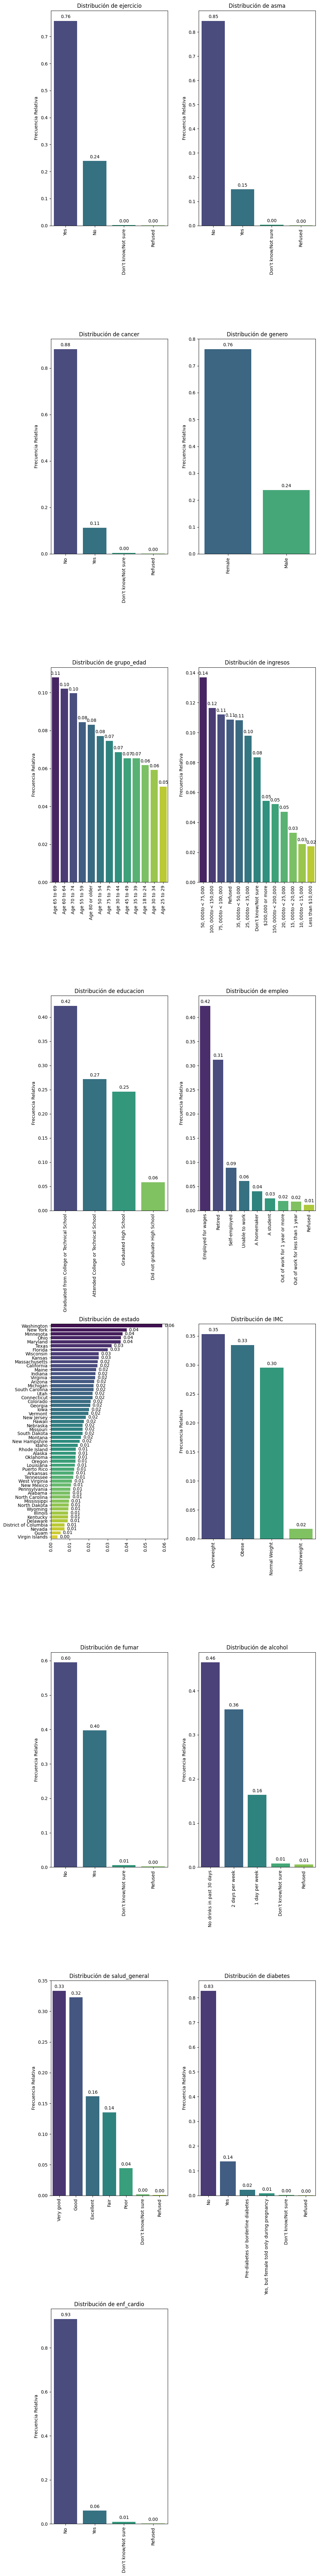

In [65]:
pinta_distribucion_categoricas(df, cols_cat, relativa=True, mostrar_valores=True)

sns.